In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submission = pd.read_csv("sample_submission.csv")

In [5]:
train.shape, test.shape, submission.shape

((1460, 81), (1459, 80), (1459, 2))

In [6]:
train.index, test.index, submission.index

(RangeIndex(start=0, stop=1460, step=1),
 RangeIndex(start=0, stop=1459, step=1),
 RangeIndex(start=0, stop=1459, step=1))

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [20]:
train.columns.difference(test.columns), train.columns.intersection(submission.columns)

(Index(['SalePrice'], dtype='object'),
 Index(['Id', 'SalePrice'], dtype='object'))

In [19]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB


In [ ]:
import 

In [53]:
df1 = pd.DataFrame(np.array([[1,'chn','bread',44],[2,'chn','rice',55],[3,'mum','rice',50],[4,'del','honey',155]]),
                   columns=['id','city','item','price']
                  )

In [310]:
print(df1)
data=df1.copy()

  id city   item price
0  1  chn  bread    44
1  2  chn   rice    55
2  3  mum   rice    50
3  4  del  honey   155


In [311]:
X = data.iloc[:,:-1].values
#X.drop(columns='price',inplace=True)
X.dtype,data.dtypes
type(X), type(data)

(numpy.ndarray, pandas.core.frame.DataFrame)

In [312]:
y = data.iloc[:,3].values
y

array(['44', '55', '50', '155'], dtype=object)

In [313]:
X[:,1:3]

array([['chn', 'bread'],
       ['chn', 'rice'],
       ['mum', 'rice'],
       ['del', 'honey']], dtype=object)

In [314]:
z=data.drop(columns='price').columns
z

Index(['id', 'city', 'item'], dtype='object')

In [315]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
#X=X.drop(columns='id')
print(X)
X[:,1] = labelencoder_X.fit_transform(X[:,1])
print(X)
X[:,2] = labelencoder_X.fit_transform(X[:,2])
print(X)
#X=pd.DataFrame(data=X,columns=data.drop(columns='price').columns)
#print(X)
onehotencoder = OneHotEncoder()
#X = onehotencoder.fit_transform(X).toarray() 
print(X)
print(X[:,2:])

[['1' 'chn' 'bread']
 ['2' 'chn' 'rice']
 ['3' 'mum' 'rice']
 ['4' 'del' 'honey']]
[['1' 0 'bread']
 ['2' 0 'rice']
 ['3' 2 'rice']
 ['4' 1 'honey']]
[['1' 0 0]
 ['2' 0 2]
 ['3' 2 2]
 ['4' 1 1]]
[['1' 0 0]
 ['2' 0 2]
 ['3' 2 2]
 ['4' 1 1]]
[[0]
 [2]
 [2]
 [1]]


In [322]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.2, random_state= 0) #fitting multiple regression model to the training set 


In [320]:
print(data)
print(X_train, X_test, y_train, y_test )

  id city item price
0  1    0    0    44
1  2    0    2    55
2  3    2    2    50
3  4    1    1   155
[['4' 1 1]
 ['2' 0 2]
 ['1' 0 0]] [['3' 2 2]] ['155' '55' '44'] ['50']


In [242]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)#predicting the test set results
y_train_pred = regressor.predict(X_train)
y_pred = regressor.predict(X_test)

In [243]:
print(y_pred)
print(y_test)

[83.9]
['50']


In [245]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
print('train rmse',mean_squared_error(y_train,y_train_pred,squared=False))
print('test  rmse',mean_squared_error(y_test,y_pred,squared=False))
print('mae',mean_absolute_error(y_test,y_pred))
print('r2',r2_score(y_test,y_pred))

train rmse 1.160311428702309e-14
test  rmse 33.900000000000006
mae 33.900000000000006
r2 nan


D:\Program Files\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [223]:
X.shape,y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4, 10), (4,), (3, 10), (1, 10), (3,), (1,))

In [224]:
X_train.columns

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

(3, 2)
[0.00703286 0.00109978]
[[1 1]
 [0 2]
 [0 0]]
[84.67948789]
['50']
rmse 34.6794878875035
mae 34.6794878875035
r2 nan


D:\Program Files\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


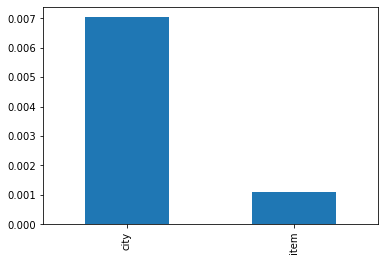

In [231]:
# Regularization
# Ridge Regression

from sklearn.linear_model import Ridge
#X2_train = X_train.drop(columns='id')
#X2_test = X_test.drop(columns='id')

ridge_model = Ridge(alpha = 10000)
ridge_model.fit(X2_train,y_train)
print(X2_train.shape)
print(ridge_model.coef_)
print(X2_train.values)
modelSlope = pd.Series(ridge_model.coef_, index=X2_train.columns).sort_values(ascending=False)
modelSlope.plot(kind = "bar")

y_pred = ridge_model.predict(X2_test)
print(y_pred)
print(y_test)
print('rmse',mean_squared_error(y_test,y_pred,squared=False))
print('mae',mean_absolute_error(y_test,y_pred))
print('r2',r2_score(y_test,y_pred))

In [233]:
# Regularization
# Lasso Regression

from sklearn.linear_model import Lasso
X2_train = X_train
X2_test = X_test
#X2_train = X_train.drop(columns='id')
#X2_test = X_test.drop(columns='id')

lasso_model = Lasso(alpha = 24)
lasso_model.fit(X2_train,y_train)
print(X2_train.shape)
print(lasso_model.coef_)
#print(X2_train.values)
modelSlope = pd.Series(lasso_model.coef_, index=X2_train.columns).sort_values(ascending=False)
modelSlope.plot(kind = "bar")

y_train_pred = lasso_model.predict(X2_train)
y_pred = lasso_model.predict(X2_test)
print(y_pred)
print(y_test)
print('train rmse',mean_squared_error(y_train,y_pred,squared=False))
print('test  rmse',mean_squared_error(y_test,y_pred,squared=False))
print('mae',mean_absolute_error(y_test,y_pred))
print('r2',r2_score(y_test,y_pred))

(3, 10)
[-0. -0.  0.  0. -0.  0.  0. -0.  0. -0.]


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [331]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.2, random_state= 0) #fitting multiple regression model to the training set 

from sklearn.preprocessing import PolynomialFeatures
print(X_train)
print(X_train[:,[1,2]])
X_train = X_train[:,[1,2]]
poly = PolynomialFeatures(degree = 1)
X_poly = poly.fit_transform(X_train)
print(X_poly)
lin2 = LinearRegression()
lin2.fit(X_poly,y_train)
#plt.scatter(x = train_X, y = train_y, color="b" )
#plt.scatter(x = test_X, y = test_y, color="r" )
#plt.plot(train_X, lin2.predict(poly.fit_transform(train_X)))
print(X_test)
print(X_test[:,[1,2]])
X_test = X_test[:,[1,2]]
X_test_poly = poly.fit_transform(X_test)
print(X_test_poly)
y_train_pred=lin2.predict(X_poly)
y_pred=lin2.predict(X_test_poly)
print(y_train_pred)
print(y_pred)
#print("Train MSE : ",mean_squared_error(y_train, poly.fit_transform(X_train)),squared=False))
#print("Test MSE : ",mean_squared_error(y_test, lin2.predict(poly.fit_transform(X_test)),squared=False))
print("Train MSE : ",mean_squared_error(y_train, y_train_pred,squared=False))
print("Test MSE : ",mean_squared_error(y_test, y_pred,squared=False))

[['4' 1 1]
 ['2' 0 2]
 ['1' 0 0]]
[[1 1]
 [0 2]
 [0 0]]
[[1. 1. 1.]
 [1. 0. 2.]
 [1. 0. 0.]]
[['3' 2 2]]
[[2 2]]
[[1. 2. 2.]]
[155.  55.  44.]
[266.]
Train MSE :  5.801557143511545e-15
Test MSE :  216.0
